In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline

#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules
import pickle

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings("ignore")
n_classifier = 7

/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hp/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
# #plot_3d_var_list = ['beta2', 'beta4','low_gamma3']

# p231, p222_1, p222_2, p229 = \
# pickle.load(open(hp.prepath_pat + '231' +'_trained.p', "rb" )),\
# pickle.load(open(hp.prepath_pat + '222_1' +'_trained.p', "rb" )), \
# pickle.load(open(hp.prepath_pat + '222_2' +'_trained.p', "rb" )), \
# pickle.load(open(hp.prepath_pat + '229_trained.p', "rb" ))

# pats = [p231, p222_1, p222_2, p229]
p231_o = pickle.load(open('/Users/hp/GitHub/EEG/patients_old/231_trained.p', "rb" ))
p229_o = pickle.load(open('/Users/hp/GitHub/EEG/patients_old/229_trained.p', "rb" ))


In [36]:
# p231_124_d = pickle.load(open(hp.prepath_pat + '231_trained_124_d.p', "rb" ))
# p231_124_nd = pickle.load(open(hp.prepath_pat + '231_trained_124_nd.p', "rb" ))
p231_90_nd = pickle.load(open(hp.prepath_pat + '231_trained_90_nd.p', "rb" ))
p222_1_90_nd = pickle.load(open(hp.prepath_pat + '222_1_trained_90_nd.p', "rb" ))
p222_2_90_nd = pickle.load(open(hp.prepath_pat + '222_2_trained_90_nd.p', "rb" ))
p229_90_nd = pickle.load(open(hp.prepath_pat + '229_trained_90_nd.p', "rb" ))

# p231_oo = pickle.load(open('/Users/hp/GitHub/EEG/patients_old/231.p', "rb" ))
#p231_124_nd = pickle.load(open(hp.prepath_pat + '231_trained_124_nonout.p', "rb" ))

pats_90_nd = [p231_90_nd, p222_1_90_nd, p222_2_90_nd, p229_90_nd]

In [24]:
p231_124_nd = pickle.load(open(hp.prepath_pat + '231_trained_124_nd.p', "rb" ))
p222_1_124_nd = pickle.load(open(hp.prepath_pat + '222_1_trained_124_nd.p', "rb" ))
p222_2_124_nd = pickle.load(open(hp.prepath_pat + '222_2_trained_124_nd.p', "rb" ))
p229_124_nd = pickle.load(open(hp.prepath_pat + '229_trained_124_nd.p', "rb" ))
pats_124_nd = [p231_124_nd, p222_1_124_nd, p222_2_124_nd, p229_124_nd]

In [21]:
p231_124_d = pickle.load(open(hp.prepath_pat + '231_trained_124_d.p', "rb" ))
p222_1_124_d = pickle.load(open(hp.prepath_pat + '222_1_trained_124_d.p', "rb" ))
p222_2_124_d = pickle.load(open(hp.prepath_pat + '222_2_trained_124_d.p', "rb" ))
p229_124_d = pickle.load(open(hp.prepath_pat + '229_trained_124_d.p', "rb" ))
pats_124_d = [p231_124_d, p222_1_124_d, p222_2_124_d, p229_124_d]

In [132]:
p231_124_d_no = pickle.load(open(hp.prepath_pat + '231_trained_124_d_no.p', "rb" ))
p222_1_124_d_no = pickle.load(open(hp.prepath_pat + '222_1_trained_124_d_no.p', "rb" ))
p222_2_124_d_no = pickle.load(open(hp.prepath_pat + '222_2_trained_124_d_no.p', "rb" ))
p229_124_d_no = pickle.load(open(hp.prepath_pat + '229_trained_124_d_no.p', "rb" ))
pats_124_d_no = [p231_124_d_no, p222_1_124_d_no, p222_2_124_d_no, p229_124_d_no]

In [6]:
p231 = pickle.load(open(hp.prepath_pat + '231_trained.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained.p', "rb" ))
p229 = pickle.load(open(hp.prepath_pat + '229_trained.p', "rb" ))
pats = [p231, p222_1, p222_2, p229]

In [139]:
# plot_funcs.plot_epoch_mean(pats, if_save = 0)
p241 = pickle.load(open(hp.prepath_pat + '241_no_trained.p', "rb" ))
pats = [p241]

In [36]:
p222_2_old = pickle.load(open('/Users/hp/Desktop/222_2_trained.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained_124_nd.p', "rb" ))

pats = [p222_2_old]

In [40]:
p229 = pickle.load(open(hp.prepath_pat + '229_trained_90_nd.p', "rb" ))
pats = [p229]

In [35]:
p229.features

,filename,region_start_time,long_epi,sleep,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,...,lowgamma4,highgamma1,highgamma2,highgamma3,highgamma4,all1,all2,all3,all4,i12,i34,epoch,label,id,if_stimulated
1633,1.315205e+17,2017-10-09 05:42:50.000025600,1.0,1.0,680.164478,566.940835,170.649179,662.119967,443.540208,728.059167,159.052021,512.346449,174.420008,1485.041628,121.870452,...,87.244114,28.910690,32.307615,13.657881,25.088590,1557.786466,4376.096636,709.713597,1878.284017,28.0,16.0,0,True,229,False
1634,1.315205e+17,2017-10-09 05:44:46.999968000,1.0,1.0,833.779602,651.250164,164.036945,828.162406,568.359164,825.928353,181.207567,656.595252,443.331936,1450.630957,151.827719,...,60.902941,28.066619,31.180925,13.563658,21.172662,2100.923760,3793.897019,656.189079,1974.650835,34.0,14.0,0,True,229,False
1635,1.315205e+17,2017-10-09 06:24:08.999971200,1.0,1.0,203.235705,264.172585,105.114985,210.849406,285.520004,333.247015,108.969777,280.716099,225.053051,649.294008,42.330092,...,86.000690,31.407322,28.223712,13.788360,26.830416,965.044443,2133.818411,361.454615,982.985999,68.0,27.0,0,True,229,False
1636,1.315205e+17,2017-10-09 10:57:08.000035200,0.0,0.0,112.641848,110.515245,70.882142,113.874863,246.154818,183.792996,109.708240,207.687674,80.492780,67.904169,45.612088,...,73.356807,32.466776,33.240435,13.281024,25.659672,740.347446,580.039480,314.440540,709.004495,0.0,0.0,0,True,229,False
1637,1.315211e+17,2017-10-10 05:02:14.999971200,1.0,1.0,986.767934,332.538069,143.791948,290.389210,624.991166,498.583798,111.804233,237.252795,192.258345,318.323154,45.893344,...,88.836421,31.201648,70.815411,13.225398,26.795423,1954.085657,2637.690746,486.038681,1008.348372,26.0,20.0,0,True,229,False
1638,1.315211e+17,2017-10-10 05:49:13.999987200,1.0,1.0,136.760449,171.131138,65.142623,320.504534,138.982599,563.006368,127.228414,306.995726,129.019659,265.994757,48.405701,...,60.609610,25.432715,27.269245,13.320850,20.358409,571.632521,1472.511456,316.656703,1073.414247,61.0,18.0,0,True,229,False
1639,1.315211e+17,2017-10-10 05:59:22.999977600,1.0,1.0,134.699012,208.390401,39.528188,119.645249,196.736448,633.993093,73.222596,296.313481,111.542970,508.269260,31.619201,...,70.315383,35.785758,31.198349,14.126692,23.951307,623.283484,1783.981643,201.155257,779.467423,63.0,19.0,0,True,229,False
1640,1.315224e+17,2017-10-11 05:41:48.999984000,1.0,1.0,892.982169,213.389915,89.680107,311.030932,649.320535,377.638450,88.172255,244.166774,141.862276,309.385845,69.162401,...,58.594434,27.513270,29.644434,14.281776,25.414532,2041.113198,1829.581805,412.015766,1105.758960,28.0,16.0,0,True,229,False
1641,1.315224e+17,2017-10-11 09:47:15.000000000,1.0,0.0,99.993069,106.881199,26.926312,55.914169,149.341963,111.237546,49.992485,59.479049,88.554442,32.911214,26.851214,...,42.476628,33.065410,23.144331,13.948173,23.062545,498.437238,372.045348,179.645672,353.406801,20.0,15.0,0,True,229,False
1642,1.315224e+17,2017-10-11 10:56:36.999974400,0.0,0.0,77.761414,84.211143,49.556652,64.207501,196.764906,219.796690,120.406283,184.741137,74.775374,61.796430,28.422012,...,59.567662,34.310232,31.773084,13.241124,24.438063,459.578702,527.817519,243.161417,530.678009,0.0,0.0,0,True,229,False


## 3. Classifier Performance

### Performace Overview of each Classifier

In [133]:
# pat= p229_o
# X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_remove_delta=0, if_remove_outliers=0)
# JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
# print(X_train)
# print(X_test)
# print(X_train.shape)
# print(X_test.shape)

# print(p229.X_train)
# print(p229.X_train.shape)

In [146]:
pat = p222_2_old
# X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_remove_delta=0, if_remove_outliers=0)

#JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
# print(X_train)
# print(X_test)
# print(X_train.shape)
# print(X_test.shape)
display(pd.DataFrame(pat.features))
pat2 = p222_2
# pat2.X_train
# print(pat2.X_train.shape)
display(pd.DataFrame(pat2.features))

,filename,region_start_time,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,...,low_gamma4,high_gamma1,high_gamma2,high_gamma3,high_gamma4,all1,all2,all3,all4,i12,i34,epoch,label,id,if_stimulated
1089,131220014253120000.000,2016-10-26 04:00:05.040000000,54.211,297.960,32.429,83.964,62.839,523.645,79.143,184.930,41.350,191.894,71.109,145.441,57.965,...,91.228,15.660,38.097,49.258,37.163,245.867,1369.853,448.175,703.691,0.000,0.000,0,False,222_2,False
1090,131220014520170000.000,2016-10-26 16:00:02.016000000,47.472,159.043,31.859,84.967,109.422,373.546,85.986,244.094,29.521,129.649,91.857,214.980,48.294,...,99.136,15.991,36.483,42.677,43.403,263.867,947.331,460.661,904.545,0.000,0.000,0,False,222_2,False
1091,131220869370360000.000,2016-10-26 21:00:03.974400000,41.931,108.438,69.419,110.234,106.375,278.619,117.249,351.647,46.919,127.613,128.094,231.575,64.350,...,111.033,16.511,36.135,76.727,52.821,299.942,847.013,648.921,1116.729,4.000,3.000,0,False,222_2,False
1092,131220869630030000.000,2016-10-27 03:59:53.030400000,49.720,230.295,46.013,117.850,54.499,320.977,76.642,158.011,35.825,148.020,64.054,118.758,55.133,...,89.101,15.438,40.513,39.215,41.602,225.390,1096.402,398.163,695.418,0.000,0.000,0,False,222_2,False
1093,131220870160910000.000,2016-10-27 15:59:50.006400000,48.350,151.536,30.031,101.820,100.308,427.709,104.942,229.555,30.047,164.008,118.581,184.168,46.875,...,96.234,15.928,40.064,28.695,41.851,255.421,1076.992,541.706,861.560,0.000,0.000,0,False,222_2,False
1094,131221814461290000.000,2016-10-27 20:59:49.027200000,37.744,117.549,28.936,65.394,90.212,412.874,75.153,208.658,38.768,115.981,66.024,157.262,59.969,...,110.063,14.980,31.733,36.717,42.422,254.621,919.917,425.535,765.335,0.000,0.000,0,False,222_2,False
1095,131221814721720000.000,2016-10-28 03:59:48.019200000,53.911,234.662,54.744,151.328,57.728,293.542,120.827,210.181,81.141,176.645,105.227,144.573,90.753,...,65.713,15.115,34.389,42.072,36.113,309.605,1051.809,586.854,823.475,0.000,0.000,0,False,222_2,False
1096,131221814981600000.000,2016-10-28 15:59:44.995200000,87.013,192.469,51.713,113.061,113.824,399.996,95.972,239.493,39.319,169.889,81.867,145.222,55.238,...,103.513,15.320,37.316,35.879,42.837,322.268,1061.248,469.971,851.831,0.000,1.000,0,False,222_2,False
1097,131222614955140000.000,2016-10-28 20:59:42.979200000,45.865,164.612,25.809,77.150,78.674,394.479,87.269,170.737,30.267,109.402,89.003,185.768,51.308,...,89.607,15.731,30.814,30.860,36.590,233.431,923.530,471.252,775.957,0.000,0.000,0,False,222_2,False
1098,131222615215480000.000,2016-10-29 03:59:32.035200000,140.156,582.145,156.424,405.238,163.884,535.213,208.995,395.974,68.671,188.748,78.553,112.426,46.912,...,60.692,14.981,31.669,37.029,36.127,444.684,1620.689,646.176,1145.947,3.000,0.000,0,False,222_2,False


,filename,region_start_time,long_epi,sleep,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,...,lowgamma4,highgamma1,highgamma2,highgamma3,highgamma4,all1,all2,all3,all4,i12,i34,epoch,label,id,if_stimulated
1276,131220014253120000.000,2016-10-26 04:00:04.999996800,0.000,1.000,54.211,297.960,32.429,83.964,62.839,523.645,79.143,184.930,41.350,191.894,71.109,...,91.228,9.834,29.362,39.366,29.638,240.042,1361.118,438.283,696.166,0.000,0.000,0,False,222_2,False
1277,131220014520170000.000,2016-10-26 16:00:02.000016000,0.000,0.000,47.472,159.043,31.859,84.967,109.422,373.546,85.986,244.094,29.521,129.649,91.857,...,99.136,9.976,28.030,29.830,34.453,257.851,938.879,447.813,895.594,0.000,0.000,0,False,222_2,False
1278,131220869370360000.000,2016-10-26 21:00:03.999974400,0.000,0.000,41.931,108.438,69.419,110.234,106.375,278.619,117.249,351.647,46.919,127.613,128.094,...,111.033,10.242,27.304,65.364,44.190,293.673,838.181,637.559,1108.098,4.000,3.000,0,False,222_2,False
1279,131220869630030000.000,2016-10-27 03:59:52.999987200,0.000,1.000,49.720,230.295,46.013,117.850,54.499,320.977,76.642,158.011,35.825,148.020,64.054,...,89.101,9.653,31.485,30.500,33.025,219.605,1087.374,389.448,686.841,0.000,0.000,0,False,222_2,False
1280,131220870160910000.000,2016-10-27 15:59:50.000006400,0.000,0.000,48.350,151.536,30.031,101.820,100.308,427.709,104.942,229.555,30.047,164.008,118.581,...,96.234,9.918,31.063,20.963,33.312,249.410,1067.992,533.975,853.021,0.000,0.000,0,False,222_2,False
1281,131221814461290000.000,2016-10-27 20:59:48.999984000,0.000,0.000,37.744,117.549,28.936,65.394,90.212,412.874,75.153,208.658,38.768,115.981,66.024,...,110.063,9.440,23.592,29.026,34.023,249.081,911.775,417.845,756.936,0.000,0.000,0,False,222_2,False
1282,131221814721720000.000,2016-10-28 03:59:48.000019199,0.000,1.000,53.911,234.662,54.744,151.328,57.728,293.542,120.827,210.181,81.141,176.645,105.227,...,65.713,9.576,25.844,32.926,28.260,304.067,1043.264,577.708,815.622,0.000,0.000,0,False,222_2,False
1283,131221814981600000.000,2016-10-28 15:59:45.000038400,0.000,0.000,87.013,192.469,51.713,113.061,113.824,399.996,95.972,239.493,39.319,169.889,81.867,...,103.513,9.577,28.268,24.686,33.789,316.524,1052.201,458.778,842.783,0.000,1.000,0,False,222_2,False
1284,131222614955140000.000,2016-10-28 20:59:43.000022400,0.000,0.000,45.865,164.612,25.809,77.150,78.674,394.479,87.269,170.737,30.267,109.402,89.003,...,89.607,9.790,23.094,23.314,29.011,227.490,915.809,463.706,768.378,0.000,0.000,0,False,222_2,False
1285,131222615215480000.000,2016-10-29 03:59:32.000035200,0.000,1.000,140.156,582.145,156.424,405.238,163.884,535.213,208.995,395.974,68.671,188.748,78.553,...,60.692,9.361,24.018,27.961,28.351,439.064,1613.038,637.108,1138.172,3.000,0.000,0,False,222_2,False


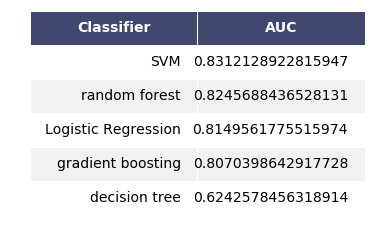

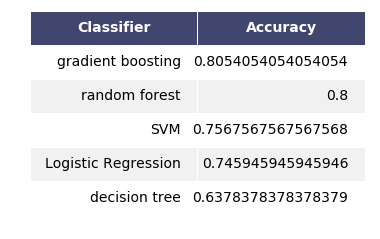

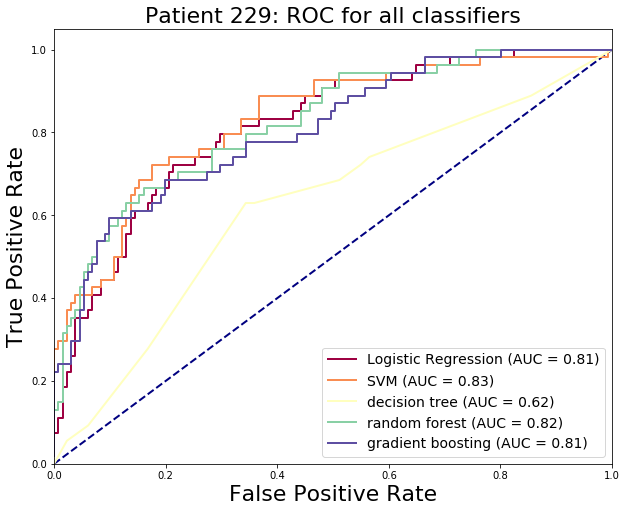

In [46]:
for pat in pats:
    X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
    JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
    plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

### The confusion matrix and ROC of Gradient Boosting (the best classifier in this case)

[[0.974371   1.12793394 0.65457509 1.09212041]
 [0.3126452  0.38741524 0.08475433 0.46048102]
 [0.93454868 0.70901262 0.00531648 0.        ]
 [0.96884663 0.27570232 0.         0.19757327]
 [0.21085116 0.36924052 0.45690302 0.31191841]
 [0.         0.         0.         0.        ]]


<Figure size 720x576 with 0 Axes>

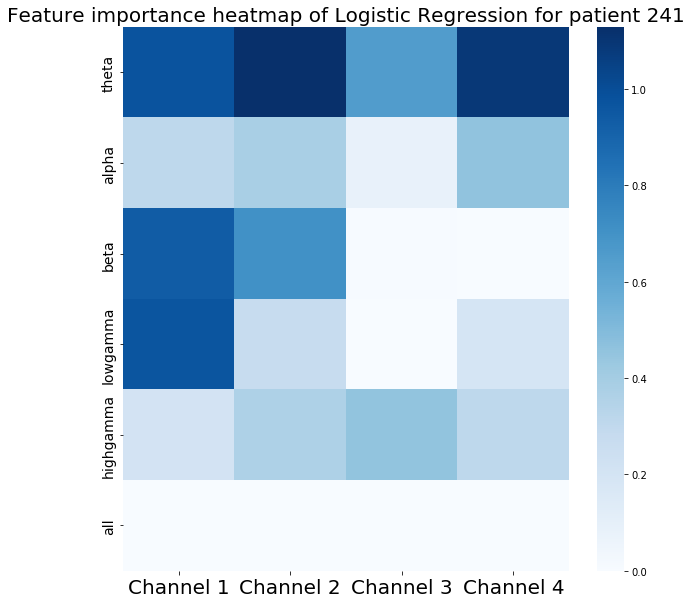

The 3 most important features for Logistic Regression are, delta Channel 1 , delta Channel 2 , delta Channel 4 
[[0.05545517 0.06791866 0.03019075 0.05718632]
 [0.03509455 0.03693797 0.03038951 0.0325778 ]
 [0.04125022 0.04395937 0.02793639 0.02797688]
 [0.0427531  0.04786683 0.03201375 0.04259598]
 [0.0663087  0.06368963 0.04889386 0.05621926]
 [0.03435848 0.0241725  0.0255368  0.02871751]]


<Figure size 720x576 with 0 Axes>

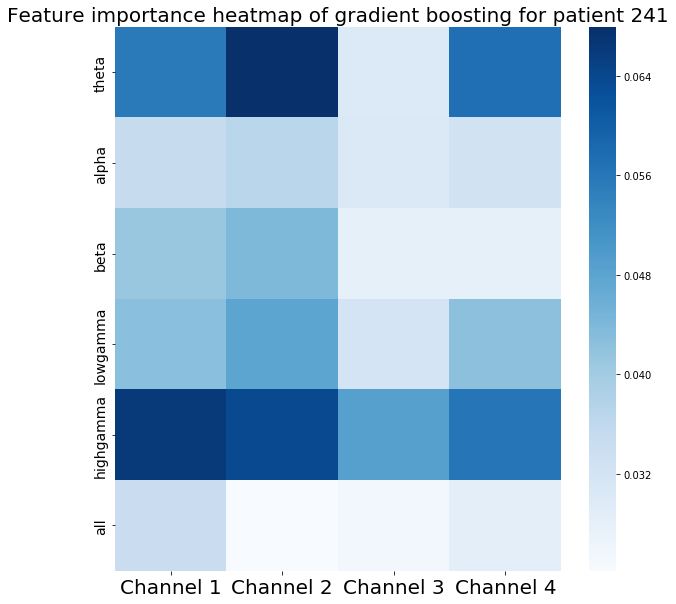

The 3 most important features for gradient boosting are, lowgamma Channel 2 , lowgamma Channel 1 , delta Channel 2 


In [73]:
for pat in pats:
    plot_funcs.feature_importance(pat, 1, if_save = 0)
    plot_funcs.feature_importance(pat, 7, if_save = 0)

## Pairwise features scatter plot

### Each data point corresponds to a .dat file. Red points means it is in a good epoch, and blue points means it is in a bad epoch.

In [7]:
if_remove_sleep = 1
if_remove_icd = 1
p229.features
dlist = ['region_start_time', 'epoch', 'filename', 'if_stimulated', 'id']
if if_remove_sleep:
        dlist.append('sleep')
if if_remove_icd:
    dlist.append('i12')
    dlist.append('i34')
p229.features.drop(dlist, axis = 1, inplace = False)

,delta1,delta2,delta3,delta4,theta1,...,all1,all2,all3,all4,label
1633,680.164478,566.940835,170.649179,662.119967,443.540208,...,1557.786466,4376.096636,709.713597,1878.284017,True
1634,833.779602,651.250164,164.036945,828.162406,568.359164,...,2100.923760,3793.897019,656.189079,1974.650835,True
1635,203.235705,264.172585,105.114985,210.849406,285.520004,...,965.044443,2133.818411,361.454615,982.985999,True
1636,112.641848,110.515245,70.882142,113.874863,246.154818,...,740.347446,580.039480,314.440540,709.004495,True
1637,986.767934,332.538069,143.791948,290.389210,624.991166,...,1954.085657,2637.690746,486.038681,1008.348372,True
...,...,...,...,...,...,...,...,...,...,...,...
2677,177.642733,143.559061,48.646858,143.160476,220.797609,...,659.217927,807.328884,213.962279,902.208270,False
2678,477.594196,250.664274,103.266165,339.598133,342.741162,...,1354.700953,1779.718566,553.264204,1842.304475,False
2679,50.526468,44.701334,17.847229,63.053034,139.097543,...,435.650501,485.924404,123.189334,552.263910,False
2680,113.466139,132.571927,51.642178,134.267417,146.405035,...,454.233730,701.853038,343.960335,1186.022624,False


In [8]:
pd.set_option('display.max_columns', 30)
plot_funcs.get_scatter_plot_data(p231)

Total outliers removed: 21


,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,beta2,beta3,beta4,low_gamma1,low_gamma2,low_gamma3,low_gamma4,high_gamma1,high_gamma2,high_gamma3,high_gamma4,all1,all2,all3,all4,label
647,52.540879,43.652166,169.626561,47.994966,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,158.709932,195.014768,132.185618,57.815951,66.921943,84.626163,59.516749,41.280686,25.052553,26.931398,24.740500,22.402387,456.290919,504.995728,590.395180,234.908162,True
648,67.371989,36.895066,99.998346,40.672797,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,135.766837,143.574827,103.785208,42.320166,66.032288,64.156730,52.980774,39.005670,25.407701,25.493819,26.304463,22.143664,427.239571,381.793350,438.397733,206.820731,True
649,99.857643,43.743936,131.445025,50.462590,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,181.487332,155.427435,121.713626,47.794228,72.383902,61.297536,63.108861,41.514227,27.523998,26.306771,28.865205,22.853450,522.376569,393.975260,512.293985,219.247318,True
650,129.677420,85.919986,104.240635,33.813202,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,187.564442,220.525742,115.320875,53.176903,67.959740,67.252669,51.975569,33.809532,25.943668,27.780222,24.305595,19.526904,627.026604,626.899623,468.444107,208.923204,True
651,91.679727,60.534557,157.204467,58.719918,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,152.275433,146.887291,119.058054,44.874632,58.494189,54.774480,51.623943,35.571129,25.237187,23.680726,26.080258,21.100966,456.565769,425.212688,514.410648,219.907144,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,104.142656,43.925946,121.402267,44.771501,100.667476,52.816564,128.193040,57.710658,73.100934,80.999027,84.178656,55.898530,180.188003,153.371412,134.589291,76.729897,73.132145,72.736170,66.563743,57.017947,35.054053,30.561880,34.055171,26.327198,565.235824,433.611692,565.892970,318.116432,False
1536,113.162000,50.395396,91.166914,40.079455,89.966879,90.940386,96.887581,31.257395,71.331918,74.857445,60.687237,23.724263,179.689975,199.345068,133.518224,44.251346,69.958346,76.662801,64.934303,39.175853,29.381314,29.061903,31.572590,24.162478,553.015062,520.205682,477.339595,202.079093,False
1537,225.536331,153.708886,189.820605,71.536294,225.670238,264.015213,207.829890,114.269363,205.670618,163.124737,92.963880,126.173273,361.828344,249.855214,162.831969,162.036871,103.103140,99.690895,70.906170,61.020523,43.167140,40.375479,33.251599,28.278869,1164.053593,966.641831,753.566978,560.389747,False
1538,85.753303,34.006378,103.498303,41.858699,113.615081,76.859677,149.850580,64.627288,60.633478,73.064497,64.475270,22.612823,180.194488,178.442120,128.550630,45.130712,70.494224,68.510785,63.167042,39.918934,31.170735,28.318351,34.481422,25.607426,539.689490,458.521869,543.486784,239.335682,False


In [34]:
p231.features_list = ['high_gamma3', "high_gamma4"]
p222_1.features_list = ['beta4', "low_gamma3"]
p222_2.features_list = ['high_gamma2', "beta4"]
p229.features_list = ['high_gamma4', "low_gamma1"]

Total outliers removed: 21


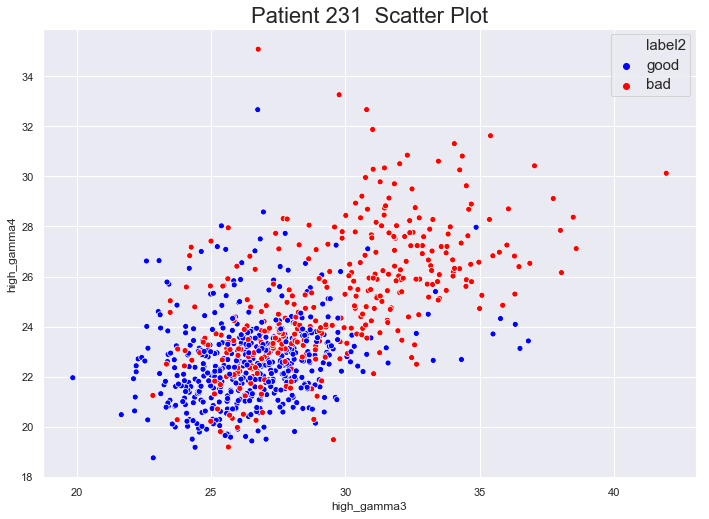

Total outliers removed: 19


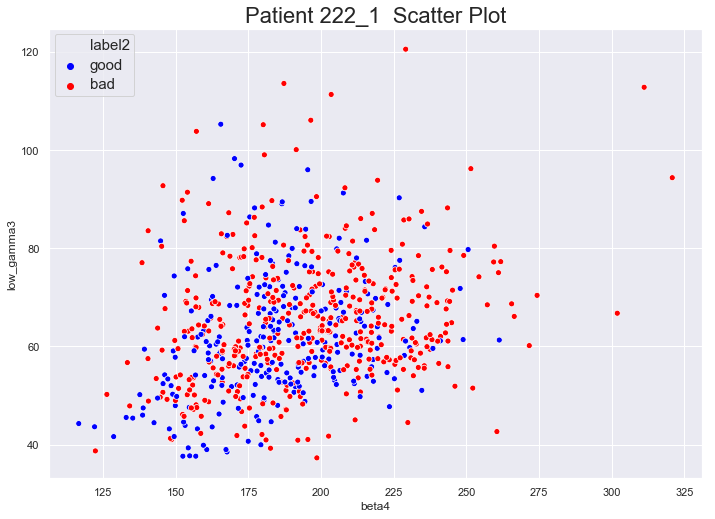

Total outliers removed: 9


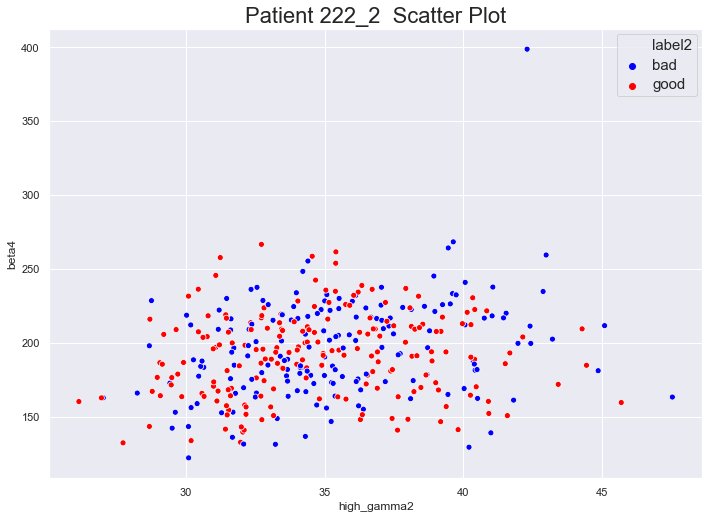

Total outliers removed: 42


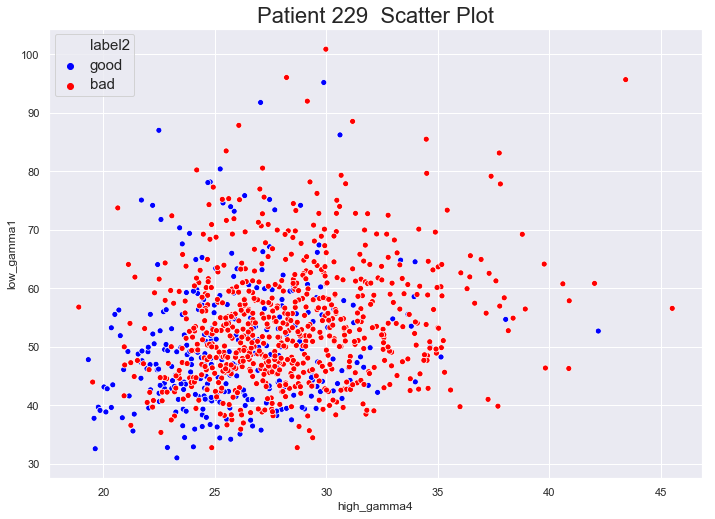

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
for pat in pats:
    data_s = plot_funcs.get_scatter_plot_data(pat)
    data_s.loc[data_s['label'] == True, 'label2'] = 'good'
    data_s.loc[data_s['label'] == False, 'label2'] = 'bad'
    sns.set(font_scale=2)
    colors = ["bright red", "sky"]
    #sns.pairplot(data_ml, hue="label_sti", size = 5, vars=JJ.get_variable_name(features_list), plot_kws={"s": 5},palette=sns.diverging_palette(240, 10, n=4))
    #g = sns.pairplot(data_s, hue="label", size = 8, vars=pat.features_list, plot_kws={"s": 30},palette=sns.xkcd_palette(colors))
    features = pat.features_list
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    g = sns.scatterplot(x = features[0], y = features[1], hue = 'label2', data = data_s,legend = 'brief',palette=['blue','red'])
    #plt.tight_layout(pad=5.2, w_pad=0.2, h_pad=0.5)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.title('Patient {0}  Scatter Plot'.format(pat.id), fontsize=hp.label_fontsize)
    #plt.legend(['bad','good'])
    plt.savefig('../fig/'+ pat.id + '/scatter.png')
    plt.show()

### 3D scatter plot

In [ ]:
%matplotlib notebook

JJ.scatter_plot_3d(data,patid, var_list = plot_3d_var_list)
